<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>–ü—Ä–∏–∫–ª–∞–¥–Ω—ã–µ –∑–∞–¥–∞—á–∏ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö</center></h1>
<h2><center>–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 4</center></h2>

–í —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ –º—ã –±—É–¥–µ–º —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –º—É–∑—ã–∫–∏. –î–ª—è —ç—Ç–æ–≥–æ –º—ã —Ä–µ–∞–ª–∏–∑—É–µ–º –º–µ—Ç–æ–¥ –∫–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏ –º–æ–¥–µ–ª—å —Å–æ —Å–∫—Ä—ã—Ç—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, —Å—Ä–∞–≤–Ω–∏–º –∏—Ö –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã. –í–æ –≤—Å–µ—Ö –∑–∞–¥–∞–Ω–∏—è—Ö —Ä–∞–∑—Ä–µ—à–∞–µ—Ç—Å—è –ø–µ—Ä–µ–ø–∏—Å—ã–≤–∞—Ç—å –∫–æ–¥ –ø–æ —Å–≤–æ–µ–º—É —É—Å–º–æ—Ç—Ä–µ–Ω–∏—é, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã–µ —à–∞–±–ª–æ–Ω—ã –Ω–µ—Å—É—Ç –ª–∏—à—å —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä.

In [1]:
import time
import typing
import warnings

warnings.filterwarnings('ignore')

import tqdm
import numpy
import sympy
import pandas
import joblib
import itertools
import scipy.sparse
import sklearn.preprocessing
import tqdm.contrib.itertools
import matplotlib.pyplot as plt

In [2]:
def measure_time(func):
    start = time.time()
    res = func()
    end = time.time()
    return res, end - start

In [3]:
ratings = pandas.read_csv('music_dataset.csv')
ratings.head()

userId  trackId
0       0       14
1       0       95
2       0      219
3       0      220
4       0      404

In [4]:
tracks_info = pandas.read_csv('tracks_info.csv')
tracks_info.head()

id                         name              artists
0   0                What There Is             ['a-ha']
1   1  I'll Play The Blues For You      ['Albert King']
2   2  Breaking Up Somebody's Home      ['Albert King']
3   3                      Imma Be  ['Black Eyed Peas']
4   4                Boom Boom Pow  ['Black Eyed Peas']

–î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫—É $MAP@k$.

$$
MAP@k = \frac{1}{N} \sum_{u = 1}^N AP_u@k
$$
$$
AP_u@k = \frac{1}{\min(k, n_u)} \sum_{i=1}^k r_u(i) p_u@i
$$
$$p_u@k = \dfrac{1}{k}\sum_{j=1}^k r_u(j)$$


*   $N$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.
*   $n_u$ - —á–∏—Å–ª–æ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —Ç—Ä–µ–∫–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è $u$ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ.
*   $r_u(i)$ - –±–∏–Ω–∞—Ä–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞: –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –ª–∏ —Ç—Ä–µ–∫ –Ω–∞ –ø–æ–∑–∏—Ü–∏–∏ $i$ –∫ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–º.

**–ó–∞–¥–∞–Ω–∏–µ 1 (1 –±–∞–ª–ª).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –º–µ—Ç—Ä–∏–∫—É $MAP@k$.

In [5]:
def apk(relevant: typing.List[int], predicted: typing.List[int], k: int = 20):
    rel = numpy.isin(predicted[:k], relevant)
    pr_rel = rel * numpy.cumsum(rel) / numpy.arange(1, k + 1)
    return numpy.sum(pr_rel) / min(k, len(relevant))

def mapk(relevant: typing.List[typing.List[int]], predicted: typing.List[typing.List[int]], k: int = 20):
    return numpy.mean([ apk(*data, k) for data in zip(relevant, predicted) ])

In [6]:
relevant = [
    [1, 7, 6, 2, 8],
    [1, 5, 4, 8],
    [8, 2, 5]
]

pred = [
    [8, 1, 5, 0, 7, 2, 9, 4],
    [0, 1, 8, 5, 3, 4, 7, 9],
    [9, 2, 0, 6, 8, 5, 3, 7]
]

assert round(mapk(relevant, pred, k = 5), 4) == 0.4331

–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ —Ç–∞–∫, —á—Ç–æ–±—ã –≤ —Ç–µc—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç –ø–æ–ø–∞–ª–∏ 50 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Ç—Ä–µ–∫–æ–≤ –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

In [7]:
def train_test_split(ratings):
    train_ratings, test_ratings = [], []
    num_test_samples = 50

    # getting train samples
    for userId, user_data in tqdm.tqdm(ratings.groupby('userId')):
        train_ratings += [user_data[:-num_test_samples]]

    train_ratings = pandas.concat(train_ratings).reset_index(drop = True)
    all_train_items = train_ratings['trackId'].unique()

    # getting train samples
    # we drop all tracks that are not presented it the training samples,
    # because we won't be able to learn representations for them
    for userId, user_data in tqdm.tqdm(ratings.groupby('userId')):
        test_items = user_data[-num_test_samples:]
        test_items = test_items[numpy.isin(test_items['trackId'], all_train_items)]
        test_ratings += [test_items]

    test_ratings = pandas.concat(test_ratings).reset_index(drop = True)

    return train_ratings, test_ratings

In [8]:
train_ratings, test_ratings = train_test_split(ratings)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [00:00<00:00, 3707.78it/s]


–ü–æ—á–∏—Å—Ç–∏–º —Ç–∞–±–ª–∏—á–∫—É —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ —Ç—Ä–µ–∫–∞—Ö –∏ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º id —Ç—Ä–µ–∫–æ–≤ —Ç–∞–∫, —á—Ç–æ–±—ã –æ–Ω–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞–ª–∏ –∏—Ö –ø–æ—Ä—è–¥–∫–æ–≤–æ–º—É –Ω–æ–º–µ—Ä—É.

In [9]:
redundant_rows = numpy.where(~numpy.isin(tracks_info['id'], train_ratings['trackId'].unique()))[0]
tracks_info.drop(redundant_rows, inplace = True)
tracks_info = tracks_info.reset_index(drop = True)

In [10]:
def ids_encoder(ratings):
    users = sorted(ratings['userId'].unique())
    items = sorted(ratings['trackId'].unique())

    # create users and items encoders
    uencoder = sklearn.preprocessing.LabelEncoder()
    iencoder = sklearn.preprocessing.LabelEncoder()

    # fit users and items ids to the corresponding encoder
    uencoder.fit(users)
    iencoder.fit(items)

    return uencoder, iencoder

In [11]:
uencoder, iencoder = ids_encoder(train_ratings)
train_ratings['trackId'] = iencoder.transform(train_ratings['trackId'].tolist())
test_ratings['trackId'] = iencoder.transform(test_ratings['trackId'].tolist())
tracks_info['id'] = iencoder.transform(tracks_info['id'].tolist())

In [12]:
train_ratings.head()

userId  trackId
0       0       14
1       0       95
2       0      219
3       0      220
4       0      404

In [13]:
test_ratings.head()

userId  trackId
0       0    57582
1       0    57802
2       0    57957
3       0    58174
4       0    59168

–°–æ–±–µ—Ä–µ–º –≤—Å–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ —Ç—Ä–µ–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ —Å–ø–∏—Å–æ–∫.

In [14]:
test_relevant = []
test_users = []
for user_id, user_data in test_ratings.groupby('userId'):
    test_relevant += [user_data['trackId'].tolist()]
    test_users.append(user_id)

**–ó–∞–¥–∞–Ω–∏–µ 2 (1 –±–∞–ª–ª).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ `get_test_recommendations` –≤ –∫–ª–∞—Å—Å–µ `BaseModel`. –û–Ω –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –ø–∞—Ä–∞–º–µ—Ç—Ä `k` –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–∞—Å—Å–∏–≤ –∏–∑ `k` –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö —Ç—Ä–µ–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ —É–¥–∞–ª—è—Ç—å —É–∂–µ –ø—Ä–æ—Å–ª—É—à–∞–Ω–Ω—ã–µ —Ç—Ä–µ–∫–∏ –∏–∑ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã—Ö.

In [15]:
class BaseModel:
    def __init__(self, ratings: pandas.DataFrame):
        self.ratings = ratings
        self.n_users = len(numpy.unique(self.ratings['userId']))
        self.n_items = len(numpy.unique(self.ratings['trackId']))

        self.R = numpy.zeros((self.n_users, self.n_items))
        self.R[self.ratings['userId'], self.ratings['trackId']] = 1.
        
    def recommend(self, uid: int):
        """
        param uid: int - user's id
        return: [n_items] - vector of recommended items sorted by their scores in descending order
        """
        raise NotImplementedError

    def remove_train_items(self, preds: typing.List[typing.List[int]], k: int):
        """
        param preds: [n_users, n_items] - recommended items for each user
        param k: int
        return: np.array [n_users, k] - recommended items without training examples
        """
        new_preds = numpy.zeros((len(preds), k), dtype=int)
        for user_id, user_data in self.ratings.groupby('userId'):
            user_preds = preds[user_id]
            new_preds[user_id] = user_preds[~numpy.in1d(user_preds, user_data['trackId'])][:k]
        return new_preds

    def get_test_recommendations(self, k: int):
        test_preds = [ self.recommend(uid) for uid in range(self.n_users) ]
        test_preds = self.remove_train_items(test_preds, k)
        return test_preds[test_users]

## –ß–∞—Å—Ç—å 1. –ö–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω–∞—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è (User2User)

–ò–¥–µ—è: —á—Ç–æ–±—ã –≤—ã–±—Ä–∞—Ç—å —Ç—Ä–µ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–Ω—Ä–∞–≤—è—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é, –º–æ–∂–Ω–æ –Ω–∞–±—Ä–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ—Ö–æ–∂–∏—Ö –Ω–∞ –Ω–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (—Å–æ—Å–µ–¥–µ–π) –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫–∏–µ —Ç—Ä–µ–∫–∏ –æ–Ω–∏ —Å–ª—É—à–∞—é—Ç. –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –æ—Å—Ç–∞–µ—Ç—Å—è –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞—Ç—å —Ç—Ä–µ–∫–∏ —ç—Ç–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –≤—ã–±—Ä–∞—Ç—å —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –∑–∞–¥–∞—á–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö —á–∞—Å—Ç–µ–π: –≤—ã–±–æ—Ä–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ö–æ–∂–µ—Å—Ç–∏ –¥–≤—É—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Å–ø–æ—Å–æ–±–∞ –∞–≥—Ä–µ–≥–∞—Ü–∏–∏.

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ö–æ–∂–µ—Å—Ç–∏ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤–µ –º–µ—Ç—Ä–∏–∫–∏:

1. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ $$s(u, v) = \frac{\sum_{i \in I_u \cap I_v} r_{ui}r_{vi}}{\sqrt{\sum_{i \in I_u} r_{ui} ^2}\sqrt{\sum_{i \in I_v} r_{vi}^2}} $$

2. –ú–µ—Ä–∞ –ñ–∞–∫–∫–∞—Ä–∞

$$ s(u, v) = \frac{|I_u \cap I_v|}{|I_u \cup I_v|} $$


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –Ω–µ–º–Ω–æ–≥–æ –≤–∏–¥–æ–∏–∑–º–µ–Ω–µ–Ω–∞, —á—Ç–æ–±—ã –ø–æ–¥—Ö–æ–¥–∏—Ç—å –ø–æ–¥ –Ω–∞—à—É –∑–∞–¥–∞—á—É.


–í–æ –≤—Å–µ—Ö —Ñ–æ—Ä–º—É–ª–∞—Ö 
* $I_u$ - –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ç—Ä–µ–∫–æ–≤, –ø—Ä–æ—Å–ª—É—à–∞–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º $u$.
* $r_{ui}$ - –ø—Ä–æ—Å–ª—É—à–∞–ª –ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å $u$ —Ç—Ä–µ–∫ $i$ (0 –∏–ª–∏ 1).

–ú–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π –æ–ø—Ä–µ–¥–µ–ª–∏–º –∫–∞–∫ $$N(u) = \{ v \in U \setminus \{u\} \mid s(u, v) > \alpha\},$$ –≥–¥–µ $\alpha \, - $ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä.



–î–ª—è –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –º—ã –±—É–¥–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—É–ª–æ–π.
$$
\hat{r}_{ui} = \frac{\sum_{v \in N(u)} s(u, v) r_{vi}}{\sum_{v \in N(u)} |s(u, v)|}
$$

**–ó–∞–¥–∞–Ω–∏–µ 3.1 (1 –±–∞–ª–ª).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞.

**–ó–∞–¥–∞–Ω–∏–µ 3.2 (1 –±–∞–ª–ª).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ–¥—Å—á–µ—Ç–∞ –º–µ—Ä—ã –ñ–∞–∫–∫–∞—Ä–∞.

–§—É–Ω–∫—Ü–∏–∏ –ø—Ä–∏–Ω–∏–º–∞—é—Ç –º–∞—Ç—Ä–∏—Ü—É –æ—Ü–µ–Ω–æ–∫ –∏ –≤–µ–∫—Ç–æ—Ä –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è $u$ –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –≤–µ–∫—Ç–æ—Ä —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–æ—Ö–æ–∂–µ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è $u$ –Ω–∞ –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –°—Ç–∞—Ä–∞–π—Ç–µ—Å—å –ø–∏—Å–∞—Ç—å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∫–æ–¥, –∑–∞ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –æ—Ü–µ–Ω–∫–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–Ω–∏–∂–µ–Ω–∞.

In [16]:
def pearson(ratings: numpy.ndarray, user_vector: numpy.ndarray) -> numpy.ndarray:
    # Kind of weird that r_ui is a binary flag, but I am just doing what the task says...
    numer = numpy.sum((ratings > 0) & (user_vector > 0), axis = 1)
    return numer / numpy.sqrt(numpy.sum(ratings > 0, axis = 1) * numpy.sum(user_vector > 0))

def jaccard(ratings: numpy.ndarray, user_vector: numpy.ndarray) -> numpy.ndarray:
    numer = numpy.sum((ratings > 0) & (user_vector > 0), axis = 1)
    denom = numpy.sum((ratings > 0) | (user_vector > 0), axis = 1)
    return numer / denom

In [17]:
# As 'ratings' and 'user_vector' consist of only 0/1 in all tasks, let's implement these functions more efficiently
def pearson(ratings: numpy.ndarray, user_vector: numpy.ndarray) -> numpy.ndarray:
    return (ratings @ user_vector.T) / numpy.sqrt(ratings.sum(axis = 1) * user_vector.sum())

def jaccard(ratings: numpy.ndarray, user_vector: numpy.ndarray) -> numpy.ndarray:
    return (ratings @ user_vector.T) / numpy.logical_or(user_vector, ratings).sum(axis = 1)

**–ó–∞–¥–∞–Ω–∏–µ 4 (1 –±–∞–ª–ª).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –º–µ—Ç–æ–¥—ã `similarity` –∏ `recommend` –∫–ª–∞—Å—Å–∞ `User2User`. `recommend` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏–Ω–¥–µ–∫—Å—ã —Ç—Ä–µ–∫–æ–≤, –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫.


In [18]:
class User2User(BaseModel):
    def __init__(self, ratings, similarity_func):
        super().__init__(ratings)

        assert similarity_func in [ pearson, jaccard ]

        self.similarity_func = similarity_func
        self.alpha = 0.02

    def similarity(self, user_vector: numpy.ndarray):
        """
        user_vector: [n_items]
        """
        return self.similarity_func(self.R, user_vector)

    def recommend(self, uid: int, tol: int = 1e-10):
        sim = self.similarity(self.R[uid])
        sim[uid] = self.alpha # Exclude the user from neighbours
        N = numpy.where(sim > self.alpha)[0]

        denom = numpy.maximum(numpy.sum(numpy.abs(sim[N])), tol)
        return numpy.argsort((sim[N].reshape(-1,) @ self.R[N, :]) / denom)[::-1]

**–ó–∞–¥–∞–Ω–∏–µ 5 (1 –±–∞–ª–ª).** –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–π $MAP@k$ –æ—Ç —Ä–∞–∑–Ω—ã—Ö $k$ –¥–ª—è –æ–±–æ–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ö–æ–∂–µ—Å—Ç–∏, —Å—Ä–∞–≤–Ω–∏—Ç–µ –∏—Ö –º–µ–∂–¥—É —Å–æ–±–æ–π, –∞ —Ç–∞–∫–∂–µ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.

Pearson: 6.330974340438843
Jaccard: 8.166656255722046


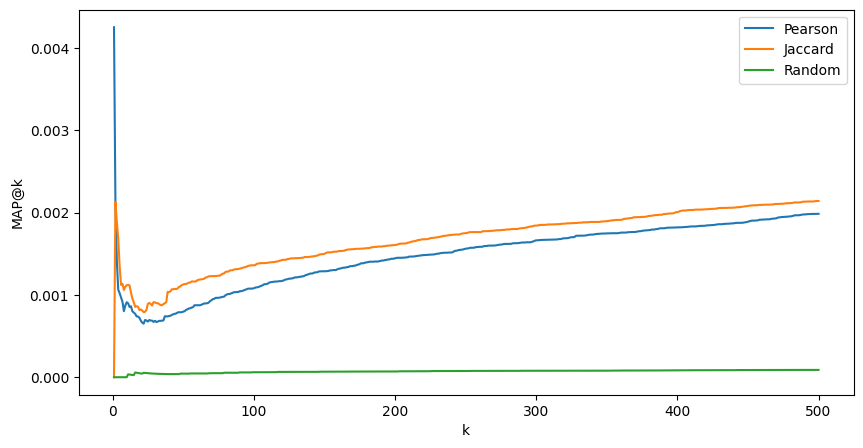

In [19]:
MAX_K = 500
numpy.random.seed(42)

pearson_model = User2User(train_ratings, pearson)
jaccard_model = User2User(train_ratings, jaccard)
random_model = BaseModel(train_ratings)

pearson_predicted, pearson_time = measure_time(lambda: pearson_model.get_test_recommendations(MAX_K))
jaccard_predicted, jaccard_time = measure_time(lambda: jaccard_model.get_test_recommendations(MAX_K))
random_predicted = numpy.random.rand(random_model.n_users, random_model.n_items).argsort(axis = 1)[:, :MAX_K]

print('Pearson:', pearson_time)
print('Jaccard:', jaccard_time)

plt.figure(figsize = (10, 5))
plt.ylabel('MAP@k')
plt.xlabel('k')

X = range(1, MAX_K + 1)
plt.plot(X, [ mapk(test_relevant, pearson_predicted, k) for k in X ], label = 'Pearson')
plt.plot(X, [ mapk(test_relevant, jaccard_predicted, k) for k in X ], label = 'Jaccard')
plt.plot(X, [ mapk(test_relevant, random_predicted, k) for k in X ], label = 'Random')
plt.legend()
plt.show()

- –ö–∞—á–µ—Å—Ç–≤–æ —Å–ª—É—á–∞–π–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –ø—Ä–µ–Ω–µ–±—Ä–µ–∂–∏–º–æ –º–∞–ª–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –Ω—É–ª—è.
- –ê–ª–≥–æ—Ä–∏—Ç–º—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ User2User —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π —Ä–∞–±–æ—Ç–∞—é—Ç –ª—É—á—à–µ —Å–ª—É—á–∞–π–Ω—ã—Ö, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –±–ª–∏–∑–∫–æ –∫ –Ω—É–ª—é.
- –ú–µ—Ä–∞ –ñ–∞–∫–∫–∞—Ä–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞
- –° —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º $k$ –≤–µ–ª–∏—á–∏–Ω–∞ MAP@k. –æ–∂–∏–¥–∞–µ–º–æ, –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç

**–ó–∞–¥–∞–Ω–∏–µ 6 (1.5 –±–∞–ª–ª–∞).** –ö–∞–∫ –≤—ã –º–æ–≥–ª–∏ –∑–∞–º–µ—Ç–∏—Ç—å, –º–∞—Ç—Ä–∏—Ü–∞ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –æ—á–µ–Ω—å —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ–π, –Ω–æ –º—ã —Ä–∞–±–æ—Ç–∞–µ–º —Å –Ω–µ–π –∫–∞–∫ —Å –æ–±—ã—á–Ω–æ–π, —ç—Ç–æ –Ω–µ –¥–µ–ª–æ. –ü–µ—Ä–µ–ø–∏—à–∏—Ç–µ –∫–æ–¥ —Ç–∞–∫, —á—Ç–æ–±—ã –≤—Å–µ –º–µ—Ç–æ–¥—ã –º–æ–≥–ª–∏ —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–º–∏ –º–∞—Ç—Ä–∏—Ü–∞–º–∏ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã —Ç–∞–∫–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ —Å –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–º.

In [20]:
def pearson_sparse(ratings: scipy.sparse.csr_matrix, user_vector: scipy.sparse.csr_matrix) -> scipy.sparse.csr_matrix:
    return pearson(ratings, user_vector) # Initial function works with sparse matrices

def jaccard_sparse(ratings: scipy.sparse.csr_matrix, user_vector: scipy.sparse.csr_matrix) -> scipy.sparse.csr_matrix:
    denom = scipy.sparse.vstack([ user_vector for _ in range(ratings.shape[0]) ])
    denom = (denom.astype('bool') + ratings.astype('bool')).sum(axis = 1)
    return (ratings @ user_vector.T) / denom

In [21]:
class User2UserSparse(User2User):
    def __init__(self, ratings, similarity_func):
        super().__init__(ratings, pearson)

        assert similarity_func in [ pearson_sparse, jaccard_sparse ]
        self.similarity_func = similarity_func
        
        self.R = scipy.sparse.csr_matrix(self.R)
        
    def similarity(self, user_vector: numpy.ndarray):
        return self.similarity_func(self.R, user_vector).toarray()

Pearson: 0.8119587898254395
Jaccard: 1.3515872955322266


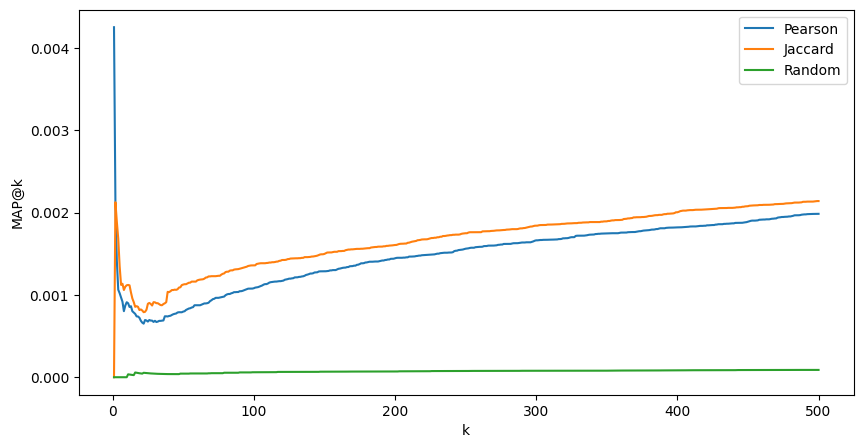

In [22]:
numpy.random.seed(42)

pearson_sparse_model = User2UserSparse(train_ratings, pearson_sparse)
jaccard_sparse_model = User2UserSparse(train_ratings, jaccard_sparse)
random_sparse_model = BaseModel(train_ratings)

pearson_sparse_predicted, pearson_sparse_time = measure_time(lambda: pearson_sparse_model.get_test_recommendations(MAX_K))
jaccard_sparse_predicted, jaccard_sparse_time = measure_time(lambda: jaccard_sparse_model.get_test_recommendations(MAX_K))
random_sparse_predicted = numpy.random.rand(random_sparse_model.n_users, random_sparse_model.n_items).argsort(axis = 1)[:, :MAX_K]

print('Pearson:', pearson_sparse_time)
print('Jaccard:', jaccard_sparse_time)

plt.figure(figsize = (10, 5))
plt.ylabel('MAP@k')
plt.xlabel('k')

X = range(1, MAX_K + 1)
plt.plot(X, [ mapk(test_relevant, pearson_sparse_predicted, k) for k in X ], label = 'Pearson')
plt.plot(X, [ mapk(test_relevant, jaccard_sparse_predicted, k) for k in X ], label = 'Jaccard')
plt.plot(X, [ mapk(test_relevant, random_sparse_predicted, k) for k in X ], label = 'Random')
plt.legend()
plt.show()

–ú—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≥–ª–∞–∑–∞–º–∏, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç —Ç—Ä–µ–∫–∏. –î–ª—è —ç—Ç–æ–≥–æ —Å—Ä–∞–≤–Ω–∏–º —É–∂–µ –ø—Ä–æ—Å–ª—É—à–∞–Ω–Ω—ã–µ —Ç—Ä–µ–∫–∏ —Å —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–º–∏ –∏ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–º–∏ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –•–æ—Ä–æ—à–æ –ª–∏ —É –≤–∞—Å –ø–æ–ª—É—á–∏–ª–æ—Å—å?

In [23]:
numpy.random.seed(0)
user_id = numpy.random.randint(0, jaccard_sparse_model.n_users)

listened_tracks = train_ratings[train_ratings.userId == user_id].trackId[:15]
display(tracks_info.loc[listened_tracks][['name', 'artists']])

name                               artists
152                  Hollywood Whore                        ['Papa Roach']
164                My Favourite Game                     ['The Cardigans']
199        Don't Phunk With My Heart                   ['Black Eyed Peas']
212             Let's Get It Started                   ['Black Eyed Peas']
234                   Wind Of Change                         ['Scorpions']
344                 Somebody Told Me                       ['The Killers']
396         The Phantom Of The Opera  ['Nightwish', 'Andrew Lloyd Webber']
422                             Stan                    ['Eminem', 'Dido']
464                     Tainted Love                    ['Marilyn Manson']
630            Every Breath You Take                        ['The Police']
707  Sweet Dreams (Are Made of This)                    ['Marilyn Manson']
746                 Behind Blue Eyes                       ['Limp Bizkit']
760                   Wonderful Life                             ['Black']
780                 Heart-Shaped Box                           ['Nirvana']
785                          Rape Me                           ['Nirvana']

In [24]:
preds = jaccard_sparse_model.get_test_recommendations(15)
display(tracks_info.loc[preds[user_id]][['name', 'artists']])

name                          artists
34418     –î—Ä–∞–º—ã –±–æ–ª—å—à–µ –Ω–µ—Ç              ['–ü–æ–ª–∏–Ω–∞ –ì–∞–≥–∞—Ä–∏–Ω–∞']
39455         Drunk Groove              ['MARUV', 'Boosin']
44188        –ú–æ–∫—Ä—ã–µ –∫—Ä–æ—Å—Å—ã             ['–¢–∏–º–∞ –ë–µ–ª–æ—Ä—É—Å—Å–∫–∏—Ö']
46279       –ú–∞–º–∞, —è —Ç–∞–Ω—Ü—É—é                       ['#2–ú–∞—à–∏']
11493  The Show Must Go On                        ['Queen']
5810        –¢–∞–∫ –∂–µ –∫–∞–∫ –≤—Å–µ                     ["A'Studio"]
49023        –ì—Ä—É—Å—Ç–Ω—ã–π –¥—ç–Ω—Å  ['Artik & Asti', '–ê—Ä—Ç—ë–º –ö–∞—á–µ—Ä']
4765            Last Night     ['P. Diddy', 'Keyshia Cole']
16829           Love Bites                  ['Def Leppard']
46042            –í—Ä–µ–º—è –¢–æ–∫                    ['–ê–Ω—Ç–æ—Ö–∞ –ú–°']
41477          –ü–æ –∑–µ—Ä–∫–∞–ª–∞–º   ['–î–µ–Ω–∏—Å RiDer', 'Kevin Mason']
48363                Au Au              ['Filatov & Karas']
39939               Heaven               ['Julia Michaels']
49988         Is This Love     ['Komodo', 'Michael Shynes']
6995    Just Like an Angel               ['Modern Talking']

In [25]:
test_tracks = test_ratings[test_ratings.userId == user_id].trackId[:15]
display(tracks_info.loc[test_tracks][['name', 'artists']])

name                               artists
63988                  If You Love Me     ['–ú–∞—Ä–∏ –ö—Ä–∞–π–º–±—Ä–µ—Ä–∏', 'Alex Davia']
64325                           –ö—Ö—É—è–º                           ['–•–∏—Ç–æ–±–æ–∏']
64568                        —Ç–∞–±–ª–µ—Ç–∫–∏                           ['–ó–µ–º—Ñ–∏—Ä–∞']
64574                        –∂–¥–∏ –º–µ–Ω—è                           ['–ó–µ–º—Ñ–∏—Ä–∞']
64576                            –∫—Ä—ã–º                           ['–ó–µ–º—Ñ–∏—Ä–∞']
64675                   ZITTI E BUONI                          ['M√•neskin']
64682                        CORALINE                          ['M√•neskin']
64683           I WANNA BE YOUR SLAVE                          ['M√•neskin']
64743                  Derni√®re Danse  ['Yves V', 'Shanguy', 'Axel Cooper']
65142  –Ø –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ —Å—Ç–∞–Ω—É —Ñ–µ–º–∏–Ω–∏—Å—Ç–∫–æ–π                           ['Nodahsa']
65323        –õ–µ–∫–∞—Ä—Å—Ç–≤–æ –æ—Ç –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–∞                              ['–ê—Å–∏—è']
65480                    Broken Parts                 ['Smash Into Pieces']
65515               Seven Nation Army        ['Gaullin', 'Julian Perretta']
65528        –ü—Ä–æ–≤–µ–¥–∏ –º–µ–Ω—è —á–µ—Ä–µ–∑ —Ç—É–º–∞–Ω                ['–ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –Ø—à–Ω–∏–∫–æ–≤–∞']
65679                          –ü—Ç–∏—á–∫–∞                   ['HammAli & Navai']

–ö–∞–∂–µ—Ç—Å—è, –ø–æ–ª—É—á–∏–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–ª–æ—Ö–æ

### –ß–∞—Å—Ç—å 2. –ú–æ–¥–µ–ª—å —Å–æ —Å–∫—Ä—ã—Ç—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

–í —ç—Ç–æ–π —á–∞—Å—Ç–∏ –º—ã –ø–æ—â—É–ø–∞–µ–º –º–µ—Ç–æ–¥ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π —Å–æ —Å–∫—Ä—ã—Ç—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.
–ò–¥–µ—è: –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ü–µ–Ω–∫–∏ –ø–æ —Ñ–æ—Ä–º—É–ª–µ
$$
\hat{r}_{ui} = \langle p_u, q_u \rangle,
$$
$p_u \in \mathbb{R}^d$ –∏ $q_i \in \mathbb{R}^d$ - –ª–∞—Ç–µ–Ω—Ç–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è $u$ –∏ –æ–±—ä–µ–∫—Ç–∞ $i$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. 

–û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º—ã –±—É–¥–µ–º MSE –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π
$$
L = \sum_{(u, i) \in R} (\hat{r}_{ui} - r_{ui})^2 + \lambda \left(\sum_{u \in U} \|p_u\|^2 + \sum_{i \in I} \|q_i\|^2\right)
$$

**–ó–∞–¥–∞–Ω–∏–µ 7 (1.5 –±–∞–ª–ª–∞).** –ù–∞ –ª–µ–∫—Ü–∏–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∏—Å—å –¥–≤–∞ –ø–æ–¥—Ö–æ–¥–∞ –∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –ú–æ–∂–Ω–æ —ç—Ç–æ –¥–µ–ª–∞—Ç—å –æ–±—ã—á–Ω—ã–º —Å—Ç–æ—Ö–∞—Å—Ç—á–µ—Å–∫–∏–º –≥—Ä–∞–¥–∏–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º, –∞ –º–æ–∂–Ω–æ –ø–æ –æ—á–µ—Ä–µ–¥–∏ –æ–±–Ω–æ–≤–ª—è—Ç—å –º–∞—Ç—Ä–∏—Ü—ã $P, Q$, –∏ —Ç–æ–≥–¥–∞ –ø–æ–ª—É—á–∏—Ç—Å—è –º–µ—Ç–æ–¥ Alternating Least Squares (ALS). –í—ã–≤–µ–¥–∏—Ç–µ —Ñ–æ—Ä–º—É–ª—ã –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –æ–±–æ–∏—Ö –º–µ—Ç–æ–¥–æ–≤.

**LFM:**

–ò–∑ –ª–µ–∫—Ü–∏–∏: \
 \
![Alternative Text][1717696476395]

[1717696476395]: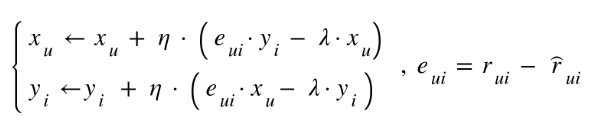

–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –æ–Ω–∏ —Ä–∞–±–æ—Ç–∞—é—Ç:

In [26]:
# r_ii is a number
R = sympy.Matrix([
    [ sympy.S('r11'), sympy.S('r12'), sympy.S('r13'), sympy.S('r14') ],
    [ sympy.S('r21'), sympy.S('r22'), sympy.S('r23'), sympy.S('r24') ],
    [ sympy.S('r31'), sympy.S('r32'), sympy.S('r33'), sympy.S('r34') ]
])

# p_i is a vector
P = sympy.Matrix([
    [ sympy.S('p1') ],
    [ sympy.S('p2') ],
    [ sympy.S('p3') ]
])

# q_i is a vector
Q = sympy.Matrix([
    [ sympy.S('q1'), sympy.S('q2'), sympy.S('q3'), sympy.S('q4') ]
])

lamb = sympy.Symbol('lambda')

def square(M: sympy.Matrix):
    return M.applyfunc(lambda i: i ** 2)

loss = sum(square(P @ Q - R)) + lamb * (sum(square(P)) + sum(square(Q)))

display(sympy.diff(loss, sympy.S('p2')))
display(2 * ((P @ Q - R) @ Q.T + lamb * P))

display(sympy.diff(loss, sympy.S('q2')))
display(2 * (P.T @ (P @ Q - R) + lamb * Q).T)

2*lambda*p2 + 2*q1*(p2*q1 - r21) + 2*q2*(p2*q2 - r22) + 2*q3*(p2*q3 - r23) + 2*q4*(p2*q4 - r24)

Matrix([
[2*lambda*p1 + 2*q1*(p1*q1 - r11) + 2*q2*(p1*q2 - r12) + 2*q3*(p1*q3 - r13) + 2*q4*(p1*q4 - r14)],
[2*lambda*p2 + 2*q1*(p2*q1 - r21) + 2*q2*(p2*q2 - r22) + 2*q3*(p2*q3 - r23) + 2*q4*(p2*q4 - r24)],
[2*lambda*p3 + 2*q1*(p3*q1 - r31) + 2*q2*(p3*q2 - r32) + 2*q3*(p3*q3 - r33) + 2*q4*(p3*q4 - r34)]])

2*lambda*q2 + 2*p1*(p1*q2 - r12) + 2*p2*(p2*q2 - r22) + 2*p3*(p3*q2 - r32)

Matrix([
[2*lambda*q1 + 2*p1*(p1*q1 - r11) + 2*p2*(p2*q1 - r21) + 2*p3*(p3*q1 - r31)],
[2*lambda*q2 + 2*p1*(p1*q2 - r12) + 2*p2*(p2*q2 - r22) + 2*p3*(p3*q2 - r32)],
[2*lambda*q3 + 2*p1*(p1*q3 - r13) + 2*p2*(p2*q3 - r23) + 2*p3*(p3*q3 - r33)],
[2*lambda*q4 + 2*p1*(p1*q4 - r14) + 2*p2*(p2*q4 - r24) + 2*p3*(p3*q4 - r34)]])

**ALS:**

$R = P * Q + \epsilon$

–§–æ—Ä–º—É–ª—ã –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ç–µ –∂–µ. –ú–µ–Ω—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ —Å–ø–æ—Å–æ–± –∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è: –Ω–µ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, –∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö. \
–ü—Ä–∏ —ç—Ç–æ–º –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Ä–µ—à–∞–µ—Ç—Å—è –∑–∞–¥–∞—á–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

<b><u>–ü—Ä–∏ –∑–∞–º–æ—Ä–æ–∑–∫–µ Q –∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ P</u></b> \
<b>–†–µ—à–∞–µ–º–∞—è –∑–∞–¥–∞—á–∞:</b> \
$R \approx P * Q$ \
<b>–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ:</b> \
$Q = (P^T * P)^{-1} * P^T * R$

<b><u>–ü—Ä–∏ –∑–∞–º–æ—Ä–æ–∑–∫–µ P –∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ Q</u></b> \
<b>–†–µ—à–∞–µ–º–∞—è –∑–∞–¥–∞—á–∞:</b> \
$R \approx P * Q$ \
$R^T \approx (P * Q)^T$ \
$R^T \approx Q^T * P^T$ \
<b>–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ:</b> \
$P^T = ((Q^T)^T * (Q^T))^{-1} * (Q^T)^T * R^T$ \
$P^T = (Q * Q^T)^{-1} * Q * R^T$ \
$P = ((Q * Q^T)^{-1} * Q * R^T)^T$ \
$P = (R^T)^T * (Q)^T * ((Q * Q^T)^{-1})^T$ \
$P = R * Q^T * ((Q * Q^T)^T)^{-1}$ \
$P = R * Q^T * ((Q^T)^T * Q^T)^{-1}$ \
$P = R * Q^T * (Q * Q^T)^{-1}$

**–ó–∞–¥–∞–Ω–∏–µ 8 (2 –±–∞–ª–ª–∞).** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –º–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –æ–±–æ–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤.

In [332]:
def loss(P: numpy.ndarray, Q: numpy.ndarray, lamb: float):
    return numpy.sum((P @ Q - R) ** 2) + lamb * (numpy.sum(P ** 2) + numpy.sum(Q ** 2))

class HiddenVarBaseModel(BaseModel):
    def __init__(self, ratings: pandas.DataFrame, dim: int = 128, num_iters: int = 5):
        super().__init__(ratings)
        self.num_iters = num_iters
        self.P = numpy.random.normal(size = (self.n_users, dim))
        self.Q = numpy.random.normal(size = (dim, self.n_items))

    def fit(self):
        raise NotImplementedError

    def recommend(self, uid):
        pred_rating = self.P[uid] @ self.Q
        return numpy.argsort(pred_rating)[::-1]
    
class LFMModel(HiddenVarBaseModel):
    def __init__(self, ratings: pandas.DataFrame, dim: int = 128, num_iters: int = 5, lr: float = 0.0003, lamb: float = 0.01):
        super().__init__(ratings, dim, num_iters)
        self.lamb = lamb
        self.lr = lr

    def fit(self):
        for _ in range(self.num_iters):
            grad_P = 2 * ((self.P @ self.Q - self.R) @ self.Q.T + self.lamb * self.P)
            grad_Q = 2 * (self.P.T @ (self.P @ self.Q - self.R) + self.lamb * self.Q)
            self.P = self.P - self.lr * grad_P
            self.Q = self.Q - self.lr * grad_Q
        return self
    
class ALSModel(HiddenVarBaseModel):
    def fit(self):
        for epoch in range(self.num_iters):
            if epoch % 2 == 0: self.Q = numpy.linalg.inv(self.P.T @ self.P) @ self.P.T @ self.R
            else: self.P = self.R @ self.Q.T @ numpy.linalg.inv(self.Q @ self.Q.T)
        return self

LFM: 1.4623322486877441
ALS: 1.195004940032959


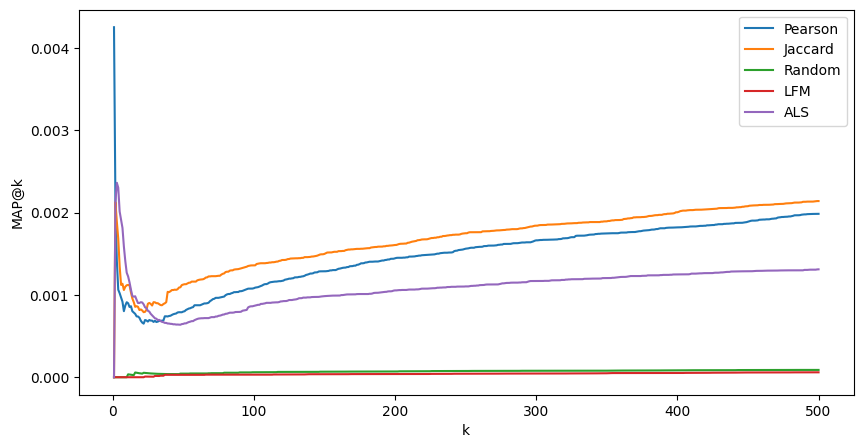

In [28]:
numpy.random.seed(42)

lfm_model = LFMModel(train_ratings).fit()
als_model = ALSModel(train_ratings).fit()

lfm_predicted, lfm_time = measure_time(lambda: lfm_model.get_test_recommendations(MAX_K))
als_predicted, als_time = measure_time(lambda: als_model.get_test_recommendations(MAX_K))

print('LFM:', lfm_time)
print('ALS:', als_time)

plt.figure(figsize = (10, 5))
plt.ylabel('MAP@k')
plt.xlabel('k')

X = range(1, MAX_K + 1)
plt.plot(X, [ mapk(test_relevant, pearson_sparse_predicted, k) for k in X ], label = 'Pearson')
plt.plot(X, [ mapk(test_relevant, jaccard_sparse_predicted, k) for k in X ], label = 'Jaccard')
plt.plot(X, [ mapk(test_relevant, random_sparse_predicted, k) for k in X ], label = 'Random')
plt.plot(X, [ mapk(test_relevant, lfm_predicted, k) for k in X ], label = 'LFM')
plt.plot(X, [ mapk(test_relevant, als_predicted, k) for k in X ], label = 'ALS')
plt.legend()
plt.show()

**–ó–∞–¥–∞–Ω–∏–µ 9 (1 –±–∞–ª–ª).** –î–ª—è –æ–±–æ–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –ø–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–∫—Ä—ã—Ç–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ $d$ –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è $k$. –ö–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —á–∏—Å–ª–æ–º –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è? –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏, —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ø–æ–¥—Ö–æ–º –∏ User2User, —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã. –ö–∞–∫–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º –≤–∞–º –∫–∞–∂–µ—Ç—Å—è –±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–º –¥–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –∏ –ø–æ—á–µ–º—É?

P.S. –•–æ—Ç—è –±—ã –æ–¥–∏–Ω –∏–∑ –º–µ—Ç–æ–¥–æ–≤ –æ–±—É—á–µ–Ω–∏—è –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –ª—É—á—à–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å User2User –ø–æ–¥—Ö–æ–¥–æ–º.

P.P.S. –ú–µ—Ç–æ–¥—É LFM —Å–≤–æ–π—Å—Ç–≤–µ–Ω–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è, –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ–ª–µ–∑–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –æ—à–∏–±–∫–∏ –∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º–æ–π –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. –í—ã —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç–µ –º–µ–Ω—è—Ç—å –Ω–∞—á–∞–ª—å–Ω—É—é –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é –∏ –ø—Ä–æ—á–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã, –Ω–∞ –≤–∞—à –≤–∫—É—Å.

In [333]:
def try_params(model_class, params):
    numpy.random.seed(42)
    model = model_class(train_ratings, *params).fit()
    predictions = model.get_test_recommendations(MAX_K)
    scores = numpy.array([ mapk(test_relevant, predictions, k) for k in range(1, MAX_K + 1) ])
    return [
        { 'params': params, 'k': f'1 - {MAX_K}', 'auc': ((scores[:-1] + scores[1:]) / 2).sum() },
        *[ { 'params': params, 'k': k + 1, 'mapk': score } for k, score in enumerate(scores) ]
    ]

In [83]:
lfm_results = joblib.Parallel(n_jobs = -1)(
    joblib.delayed(try_params)(LFMModel, params)
    for params in tqdm.contrib.itertools.product(
        [ 32, 64, 128, 256, 512 ],
        range(5, 46, 10),
        [ 3e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6 ],
        [ 1, 0.5, 0.25, 0.1, 0.05, 0.01 ]
    )
)
lfm_results = pandas.DataFrame(list(itertools.chain(*lfm_results)))
# Let's choose parameters by area under mapk@k curve: all predictions should be reasonable, not only for small k's
lfm_results.sort_values(by = 'auc', ascending = False).head(20) 

  0%|          | 0/900 [00:00<?, ?it/s]

params        k       auc  mapk
397293  (512, 25, 0.0003, 0.5)  1 - 500  0.355321   NaN
405309  (512, 25, 5e-05, 0.01)  1 - 500  0.355321   NaN
252504    (128, 45, 0.0003, 1)  1 - 500  0.355321   NaN
134769   (64, 25, 5e-05, 0.01)  1 - 500  0.355321   NaN
134268   (64, 25, 5e-05, 0.05)  1 - 500  0.355321   NaN
133767    (64, 25, 5e-05, 0.1)  1 - 500  0.355321   NaN
133266   (64, 25, 5e-05, 0.25)  1 - 500  0.355321   NaN
132765    (64, 25, 5e-05, 0.5)  1 - 500  0.355321   NaN
132264      (64, 25, 5e-05, 1)  1 - 500  0.355321   NaN
131763  (64, 25, 0.0001, 0.01)  1 - 500  0.355321   NaN
131262  (64, 25, 0.0001, 0.05)  1 - 500  0.355321   NaN
130761   (64, 25, 0.0001, 0.1)  1 - 500  0.355321   NaN
130260  (64, 25, 0.0001, 0.25)  1 - 500  0.355321   NaN
129759   (64, 25, 0.0001, 0.5)  1 - 500  0.355321   NaN
129258     (64, 25, 0.0001, 1)  1 - 500  0.355321   NaN
128757  (64, 25, 0.0003, 0.01)  1 - 500  0.355321   NaN
128256  (64, 25, 0.0003, 0.05)  1 - 500  0.355321   NaN
127755   (64, 25, 0.0003, 0.1)  1 - 500  0.355321   NaN
127254  (64, 25, 0.0003, 0.25)  1 - 500  0.355321   NaN
126753   (64, 25, 0.0003, 0.5)  1 - 500  0.355321   NaN

In [334]:
def f(size):
    numpy.random.seed(42)
    return numpy.linalg.inv(numpy.random.normal(size = (size, size)))
print((joblib.Parallel(n_jobs = 2)(joblib.delayed(f)(p) for p in [ 10 ])[0] == f(10)).all())
print((joblib.Parallel(n_jobs = 2)(joblib.delayed(f)(p) for p in [ 12 ])[0] == f(12)).all())
print((joblib.Parallel(n_jobs = 2)(joblib.delayed(f)(p) for p in [ 15 ])[0] == f(15)).all())

True
False
False


In [340]:
# numpy.linalg.inv gives incorrect results when used with joblib for big matrices (see cell above).
# Took me 3 hours to debug üò≠
# Thus, ALS cannot run in parallel :(
als_results = [ ]
for params in tqdm.contrib.itertools.product([ 32, 64, 128, 256, 512 ], range(1, 75)):
    als_results.append(try_params(ALSModel, params))
als_results = pandas.DataFrame(list(itertools.chain(*als_results)))
als_results.sort_values(by = 'auc', ascending = False).head(20)

  0%|          | 0/370 [00:00<?, ?it/s]

params        k       auc  mapk
44589  (64, 16)  1 - 500  1.065468   NaN
51102  (64, 29)  1 - 500  1.063036   NaN
43086  (64, 13)  1 - 500  1.055912   NaN
45591  (64, 18)  1 - 500  1.052359   NaN
59118  (64, 45)  1 - 500  1.051758   NaN
73146  (64, 73)  1 - 500  1.045959   NaN
59619  (64, 46)  1 - 500  1.045492   NaN
72144  (64, 71)  1 - 500  1.045348   NaN
60120  (64, 47)  1 - 500  1.044251   NaN
52104  (64, 31)  1 - 500  1.043420   NaN
53106  (64, 33)  1 - 500  1.042906   NaN
60621  (64, 48)  1 - 500  1.041576   NaN
54108  (64, 35)  1 - 500  1.041095   NaN
53607  (64, 34)  1 - 500  1.040581   NaN
62124  (64, 51)  1 - 500  1.040144   NaN
62625  (64, 52)  1 - 500  1.039664   NaN
45090  (64, 17)  1 - 500  1.039159   NaN
61623  (64, 50)  1 - 500  1.038936   NaN
61122  (64, 49)  1 - 500  1.038170   NaN
43587  (64, 14)  1 - 500  1.035784   NaN

Train LFM: 17.678871631622314
Train ALS: 0.3888683319091797
Best LFM: 1.5506772994995117
Best ALS: 1.0411880016326904


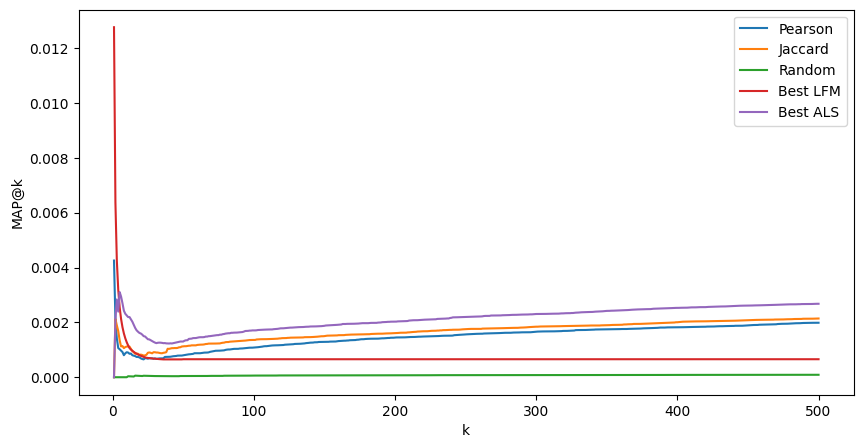

In [341]:
numpy.random.seed(42)
best_lfm_model, lfm_train_ime = measure_time(lambda: LFMModel(train_ratings, 512, 25, 0.0003, 0.5).fit())
print('Train LFM:', lfm_train_ime)

numpy.random.seed(42)
best_als_model, als_train_ime = measure_time(lambda: ALSModel(train_ratings, 64, 16).fit())
print('Train ALS:', als_train_ime)

best_lfm_predicted, best_lfm_time = measure_time(lambda: best_lfm_model.get_test_recommendations(MAX_K))
best_als_predicted, best_als_time = measure_time(lambda: best_als_model.get_test_recommendations(MAX_K))

print('Best LFM:', best_lfm_time)
print('Best ALS:', best_als_time)

plt.figure(figsize = (10, 5))
plt.ylabel('MAP@k')
plt.xlabel('k')

X = range(1, MAX_K + 1)
plt.plot(X, [ mapk(test_relevant, pearson_sparse_predicted, k) for k in X ], label = 'Pearson')
plt.plot(X, [ mapk(test_relevant, jaccard_sparse_predicted, k) for k in X ], label = 'Jaccard')
plt.plot(X, [ mapk(test_relevant, random_sparse_predicted, k) for k in X ], label = 'Random')
plt.plot(X, [ mapk(test_relevant, best_lfm_predicted, k) for k in X ], label = 'Best LFM')
plt.plot(X, [ mapk(test_relevant, best_als_predicted, k) for k in X ], label = 'Best ALS')
plt.legend()
plt.show()

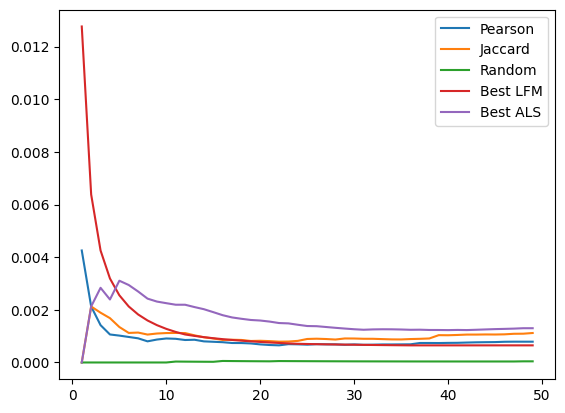

In [342]:
X = range(1, 50)
plt.plot(X, [ mapk(test_relevant, pearson_sparse_predicted, k) for k in X ], label = 'Pearson')
plt.plot(X, [ mapk(test_relevant, jaccard_sparse_predicted, k) for k in X ], label = 'Jaccard')
plt.plot(X, [ mapk(test_relevant, random_sparse_predicted, k) for k in X ], label = 'Random')
plt.plot(X, [ mapk(test_relevant, best_lfm_predicted, k) for k in X ], label = 'Best LFM')
plt.plot(X, [ mapk(test_relevant, best_als_predicted, k) for k in X ], label = 'Best ALS')
plt.legend()
plt.show()

LFM –ø–æ–∫–∞–∑–∞–ª —Ö–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–∏ –º–∞–ª–µ–Ω—å–∫–∏—Ö $k$, –Ω–æ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ–µ —É—Ö—É–¥—à–µ–Ω–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –ø–æ –º–µ—Ä–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è $k$. ALS –∂–µ –Ω–∞–ø—Ä–æ—Ç–∏–≤ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è —Ö—É–∂–µ –¥–∞–∂–µ User2User-–º–æ–¥–µ–ª–µ–π –ø—Ä–∏ –º–∞–ª–µ–Ω—å–∫–∏—Ö $k$, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π —Ä–∞—Å—Ç—ë—Ç –ø—Ä–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–∏ –±–æ–ª—å—à–µ–≥–æ —á–∏—Å–ª–∞ —Ç—Ä–µ–∫–æ–≤. \
–í —Ü–µ–ª–æ–º, –æ–±—É—á–µ–Ω–∏–µ LFM –æ–∫–∞–∑–∞–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–ª–æ–∂–Ω–æ–π –∑–∞–¥–∞—á–µ–π –∫–∞–∫ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —Ç–∞–∫ –∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤. \
–° —á–∏—Å–ª–æ–º –∏—Ç–µ—Ä–∞—Ü–∏–π –æ–±—É—á–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–æ, –æ–∂–∏–¥–∞–µ–º–æ, —Å–Ω–∞—á–∞–ª–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –∞ –∑–∞—Ç–µ–º –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–∞–¥–∞—Ç—å –∏–∑-–∑–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –¥–ª—è LFM –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –æ–∫–æ–ª–æ 25 –∏—Ç–µ—Ä–∞—Ü–∏–π, –∞ ALS –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç 15 –¥–æ 50. \
–î–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–º –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º ALS, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä–æ –∏ –æ–±—É—á–∞–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–∏–µ—Ç–µ–ª—å–Ω–æ –ª–µ–≥–∫–æ, –¥–æ—Å—Ç–∏–≥–∞—è –ø—Ä–∏ —ç—Ç–æ–º —Ö–æ—Ä–æ—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

–ï—Å–ª–∏ —É –≤–∞—Å –ø–æ–ª—É—á–∏–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ, —Ç–æ –ø—Ä–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–∞—Ä–∏—Ü—ã $Q$ –ø–æ—Ö–æ–∂–∏–º —Ç—Ä–µ–∫–∞–º —Å—Ç–∞–ª–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –ø–æ—Ö–æ–∂–∏–µ –≤–µ–∫—Ç–æ—Ä—ã. –ü–æ—ç—Ç–æ–º—É –º—ã –º–æ–∂–µ–º –¥–ª—è –ª—é–±–æ–≥–æ —Ç—Ä–µ–∫–∞ –Ω–∞–π—Ç–∏ –Ω–∞–∏–±–æ–ª–µ–µ –±–ª–∏–∑–∫–∏–µ –∫ –Ω–µ–º—É –≤ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å—Ç–µ–ø–µ—Ä—å –æ–±—É—á–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –≤—Ä—É—á–Ω—É—é.

In [343]:
example_trackId = tracks_info[tracks_info.name == '–í—ã—Ö–æ–¥–∞ –Ω–µ—Ç'].iloc[0].id

preds = best_als_model.Q.T @ best_als_model.Q.T[example_trackId]
preds = preds / numpy.sqrt((best_als_model.Q.T ** 2).sum(axis = 1) + 1e-8)

track_idxs = preds.argsort()[::-1][:20]

In [344]:
similar_tracks = tracks_info.loc[track_idxs][['name', 'artists']]
similar_tracks['similarity'] = preds[track_idxs] / numpy.linalg.norm(best_als_model.Q.T[example_trackId])
similar_tracks

name  \
5512                               –í—ã—Ö–æ–¥–∞ –Ω–µ—Ç   
2058                          –ü–æ—Å–ª–µ–¥–Ω–∏–π –≥–µ—Ä–æ–π   
16192           –û–¥–Ω–∞–∂–¥—ã –º–∏—Ä –ø—Ä–æ–≥–Ω—ë—Ç—Å—è –ø–æ–¥ –Ω–∞—Å   
2179                          –í–æ—Å—å–º–∏–∫–ª–∞—Å—Å–Ω–∏—Ü–∞   
14871                –ù–∏–∫—Ç–æ –Ω–µ —É—Å–ª—ã—à–∏—Ç (–û–π-–π–æ)   
13263                          –ú—É—Å–æ—Ä–Ω—ã–π –≤–µ—Ç–µ—Ä   
13264                       –ë–µ–∑–æ–±—Ä–∞–∑–Ω–∞—è –≠–ª—å–∑–∞   
9876                                  Wake Up   
7753                                   Nantes   
1039   Get Up I Feel Like Being A Sex Machine   
26061                        Sing, Sing, Sing   
17730                          The Mercy Seat   
21341                       Hold on Im Coming   
27732                                  –Ø –≤–µ—Ä—é   
9320                     Hope There's Someone   
16786                         Previous Crimes   
8407                          –ü–æ—Å–ª–µ–¥–Ω—è—è –ø–æ—ç–º–∞   
12475                              Colorblind   
5287                                     Home   
17795                                –ì–µ–æ—Ä–≥–∏–Ω—ã   

                                        artists  similarity  
5512                                  ['–°–ø–ª–∏–Ω']    1.000000  
2058                                   ['–ö–ò–ù–û']    0.718018  
16192                        ['–ú–∞—à–∏–Ω–∞ –≤—Ä–µ–º–µ–Ω–∏']    0.656794  
2179                                   ['–ö–ò–ù–û']    0.643966  
14871                                  ['–ß–∞–π–§']    0.628658  
13263                            ['–ö—Ä–µ–º–∞—Ç–æ—Ä–∏–π']    0.626923  
13264                            ['–ö—Ä–µ–º–∞—Ç–æ—Ä–∏–π']    0.626923  
9876                          ['Cheese People']    0.564177  
7753                                ['Barbara']    0.564177  
1039                            ['James Brown']    0.564177  
26061                          ['IKS Big Band']    0.564177  
17730             ['Nick Cave & The Bad Seeds']    0.564177  
21341                            ['Sam & Dave']    0.564177  
27732                       ['–õ—è–ø–∏—Å –¢—Ä—É–±–µ—Ü–∫–æ–π']    0.564177  
9320                  ['Antony & The Johnsons']    0.564177  
16786                          ['Devastations']    0.564177  
8407                       ['–ê–ª–µ–∫—Å–µ–π –†—ã–±–Ω–∏–∫–æ–≤']    0.564177  
12475                        ['Counting Crows']    0.564177  
5287   ['Edward Sharpe and the Magnetic Zeros']    0.564177  
17795                              ['–ê–ª–æ—ç–í–µ—Ä–∞']    0.564177